In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates 
%matplotlib inline 

import datetime as dt 
from datetime import date
import time 

import yfinance as yf 

import plotly.express as px 
import plotly.graph_objects as go 

import os 
from os import listdir
from os.path import isfile, join

import warnings
warnings.simplefilter('ignore')

In [2]:
print('Pandas version must be 1.3.5')
print(f'Pandas version: {pd.__version__}')

Pandas version must be 1.3.5
Pandas version: 1.3.5


In [3]:
print(dir(yf.Ticker('GOGL34.SA')))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_analysis', '_balancesheet', '_base_url', '_calendar', '_cashflow', '_download_options', '_earnings', '_expirations', '_financials', '_fundamentals', '_get_fundamentals', '_history', '_info', '_institutional_holders', '_isin', '_major_holders', '_mutualfund_holders', '_news', '_options2df', '_recommendations', '_scrape_url', '_shares', '_sustainability', 'actions', 'analysis', 'balance_sheet', 'balancesheet', 'calendar', 'cashflow', 'dividends', 'earnings', 'financials', 'get_actions', 'get_analysis', 'get_balance_sheet', 'get_balancesheet', 'get_calendar', 'get_cashflow', 'get_dividends', 'get_earnings', 'get_financials', 'get_info', 'get_instit

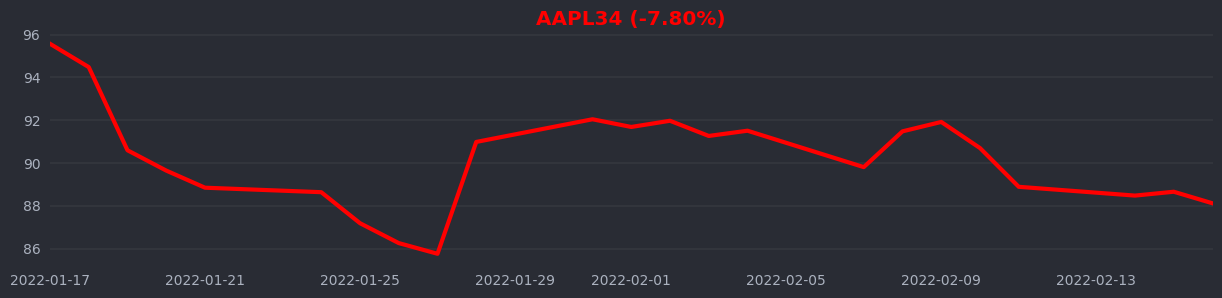

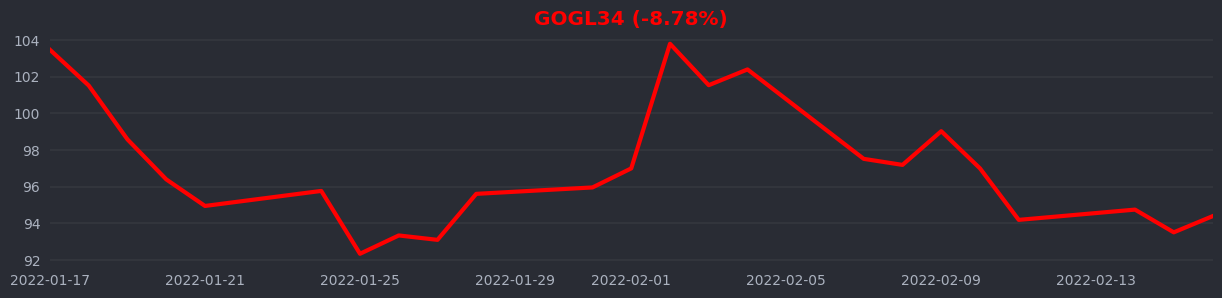

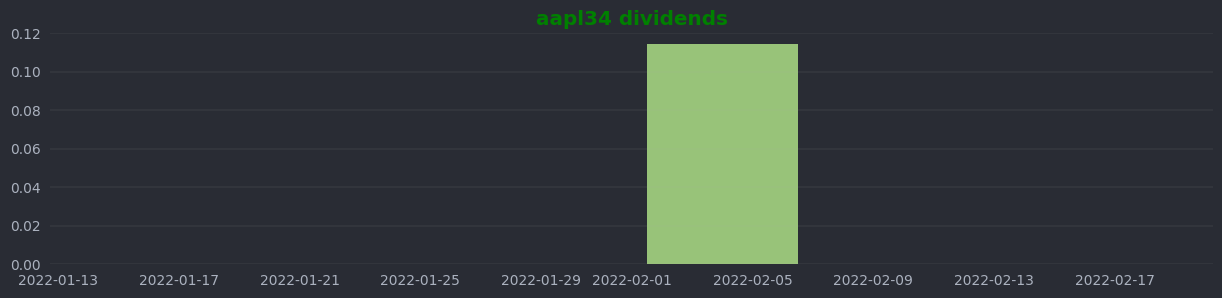

In [4]:
from HistoryPlotter import MatplotHistoryPlotter, OneDarkPlotDecorator

plotter = MatplotHistoryPlotter()
plotter = OneDarkPlotDecorator(plotter)
plotter.lineplot('aapl34', period='1mo')
plotter.lineplot('gogl34', period='1mo')
plotter.dividends('aapl34')

In [5]:
from util import get_ticker
series = get_ticker('itsa4').history(period='3mo')['Close']
series = series / series.iloc[0]
series.name = 'itsa4'
series1 = get_ticker('enbr3').history(period='3mo')['Close']
series1 = series1 / series1.iloc[0]
series1.name = 'enbr3'
history_df = pd.concat([series, series1], axis='columns')

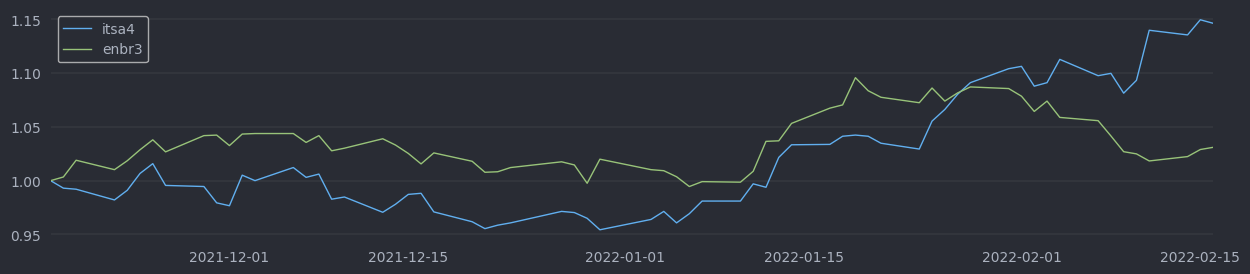

In [6]:
plotter.multi_lineplot(history_df)

In [7]:
from Portfolio import Portfolio

tickers = ['ITSA4', 'AAPL34', 'ENBR3', 'GOGL34']
percs = [0.25, 0.25, 0.20, 0.30]

portfolio = Portfolio(tickers, percs)
portfolio.get_correlations()

ITSA4.SA AAPL34.SA -> -0.18929823986658573
ITSA4.SA ENBR3.SA -> -0.6640106762625739
ITSA4.SA GOGL34.SA -> -0.23399716009870575
AAPL34.SA ENBR3.SA -> 0.047640553719605364
AAPL34.SA GOGL34.SA -> 0.8295841189580085
ENBR3.SA GOGL34.SA -> 0.08737346869551743


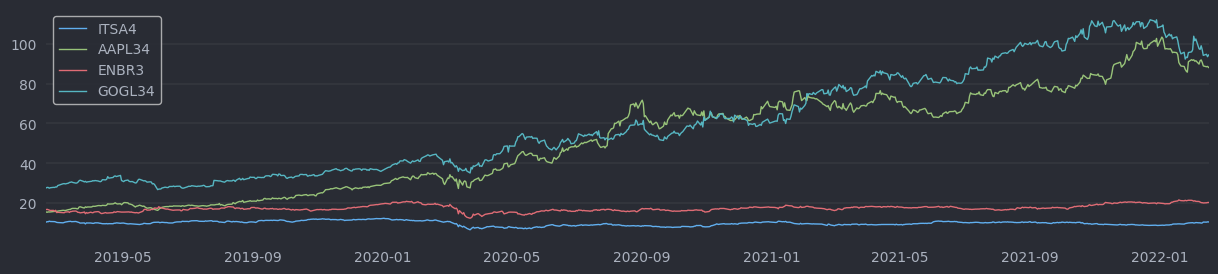

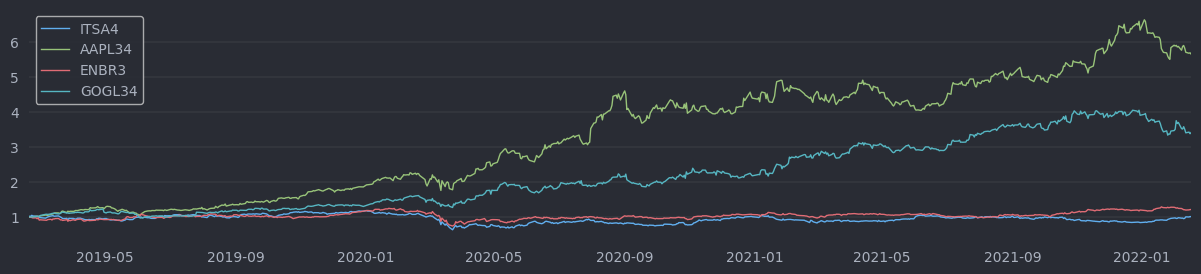

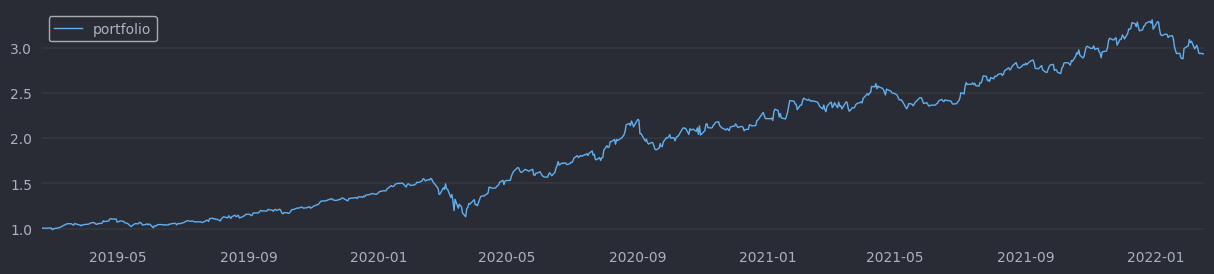

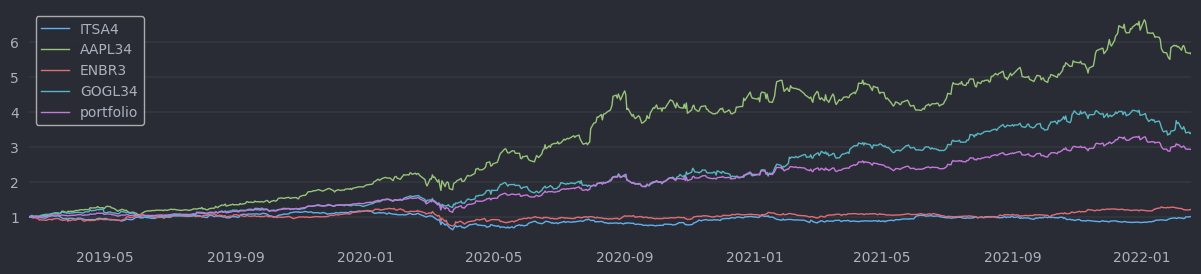

In [8]:
from PortfolioPlotter import PortfolioPlotter

p_plotter = PortfolioPlotter(portfolio, plotter)
p_plotter.plot_individual_tickers(period='3y')
p_plotter.plot_normalized_individual_tickers(period='3y')
p_plotter.plot_portfolio(period='3y')
p_plotter.plot_portfolio_and_individual_tickers(period='3y')

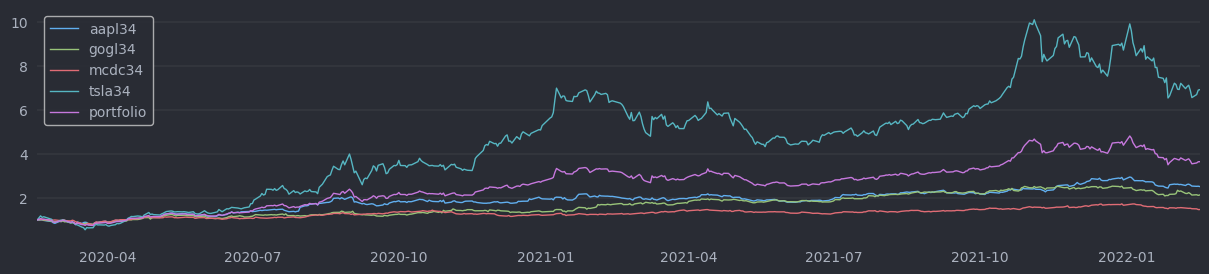

In [17]:
from Portfolio import Portfolio
port = Portfolio(['aapl34', 'gogl34', 'mcdc34', 'tsla34'], 
                 [176.24, 94.39, 65.39, 148.00])
p_plotter = PortfolioPlotter(port, plotter)
p_plotter.plot_portfolio_and_individual_tickers(period='2y')